In [ ]:
!pip install enelvo

In [2]:
import spacy
import nltk
#remover pontuação
import string
from nltk.tokenize import word_tokenize
from enelvo.normaliser import Normaliser
import pandas as pd

In [5]:
#importando os dados
musicas = pd.read_csv('musicas.csv')

In [ ]:
musicas.head(10)

In [ ]:
#download do modelo em português - Spacy
!python -m spacy download pt_core_news_sm

In [ ]:
#download dos complementos do NLTK
nltk.download('stopwords')
nltk.download('punkt')

In [11]:
from nltk.corpus import stopwords

nlp_spc = spacy.load('pt_core_news_sm')

#Limpando e tratando o texto
def limpar_texto(texto):
  #normalizar as palavras
  normalizar = Normaliser(tokenizer='readable')
  texto_normal = normalizar.normalise(texto)

  #Separar as palavras - Tokenização
  tokens = word_tokenize(texto_normal)

  #Removendo a pontuação
  tokens_sem_pontuacao = [p for p in tokens if p not in string.punctuation]

  #Remover stopwords e converter as palavras em minúsculo
  stops = stopwords.words('portuguese')
  tokens_sem_stopwords = [p.lower() for p in tokens_sem_pontuacao if p.lower() not in stops]

  #agrupando as palavras
  conjunto_token = " ".join(tokens_sem_stopwords)

  #Lemmatização - Extrair a palavra sem variação de gênero, tempo e número
  obj = nlp_spc(conjunto_token)
  tokens_lemma = [palavra.lemma_ for palavra in obj]

  return tokens_lemma

In [12]:
musicas_processadas = [limpar_texto(letra) for letra in musicas["letra"]]

ERROR:enelvo.normaliser:Failed to normalise word "antitelejornal"!
ERROR:enelvo.normaliser:Failed to normalise word "songamonga"!
ERROR:enelvo.normaliser:Failed to normalise word "utêrêrêrê"!
ERROR:enelvo.normaliser:Failed to normalise word "utêrêrêrê"!
ERROR:enelvo.normaliser:Failed to normalise word "utêrêrêrê"!
ERROR:enelvo.normaliser:Failed to normalise word "utêrêrêrê"!
ERROR:enelvo.normaliser:Failed to normalise word "chambermaid"!
ERROR:enelvo.normaliser:Failed to normalise word "deceiving"!
ERROR:enelvo.normaliser:Failed to normalise word "burungundum"!
ERROR:enelvo.normaliser:Failed to normalise word "quatrorizonte"!
ERROR:enelvo.normaliser:Failed to normalise word "êêêêêê"!
ERROR:enelvo.normaliser:Failed to normalise word "aurilibilim"!
ERROR:enelvo.normaliser:Failed to normalise word "quebratabaque"!
ERROR:enelvo.normaliser:Failed to normalise word "increible"!
ERROR:enelvo.normaliser:Failed to normalise word "indefectible"!
ERROR:enelvo.normaliser:Failed to normalise word "

In [14]:
#Agrupar todas as letras de músicas
tokens_agrupados = []
for musica in musicas_processadas:
  tokens_agrupados += musica

#Verificando os tokens agrupados
tokens_agrupados

['tão',
 'difícil',
 'ajeitar',
 'coisa',
 'cada',
 'vez',
 'agradar',
 'todo',
 'quanto',
 'fazer',
 'fica se',
 'dever',
 'pra',
 'viver',
 'ir',
 'fazer',
 'roer',
 '20',
 'unha',
 'adiantar',
 'nada',
 'correr',
 'pra',
 'velho',
 'solução',
 'todo',
 'dançar',
 'triste',
 'banda',
 'contente',
 'ritmo',
 'todo',
 'bem',
 'diferentes',
 'vez',
 'olho',
 'espelho',
 'vejo',
 'car',
 'cara',
 'ir',
 'mostrar',
 'dentro',
 'eu',
 'saco',
 'cheio',
 'porque',
 'vida',
 'fazer',
 'somente',
 'tamanho',
 'todo',
 'direito',
 'reclamar',
 'peito',
 'achar',
 'mente',
 'condição',
 'faltar',
 'força',
 'duvidoso',
 'razão',
 'preciso',
 'urgentemente',
 'psicanalista',
 'ir',
 'pagar',
 'pra',
 'ver',
 'ponto',
 'ver',
 'então',
 'trato',
 'viola',
 'ir',
 'pro',
 'mato',
 'senão',
 'cabeça',
 'exploder',
 'explode',
 '…',
 'exploder',
 '…',
 'exploder',
 '…',
 'saber',
 'implore',
 'processo',
 'simplesmente',
 'dissolveer',
 'digo',
 'onde',
 'ver',
 'corpo',
 'confuso',
 'cabeça',
 'fun

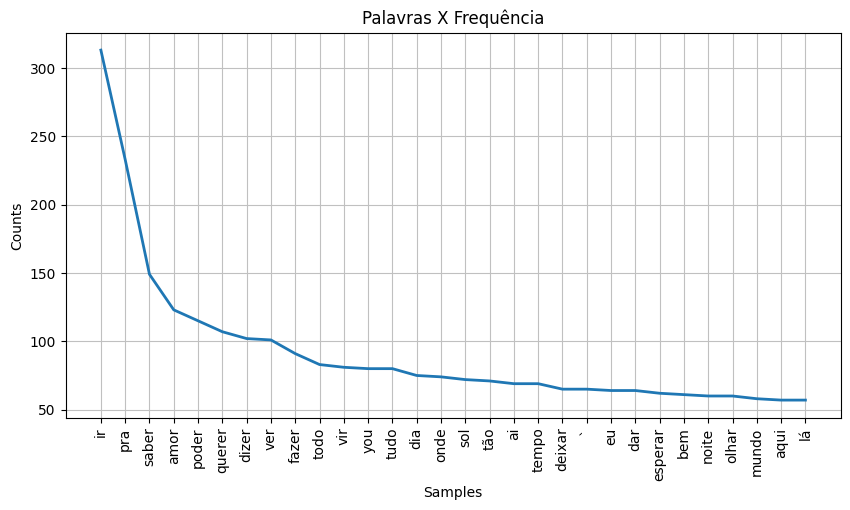

<Axes: title={'center': 'Palavras X Frequência'}, xlabel='Samples', ylabel='Counts'>

In [15]:
#gerando um gráfico da frequência de palavras
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
fd = nltk.FreqDist(tokens_agrupados)
fd.plot(30, title="Palavras X Frequência", cumulative=False)

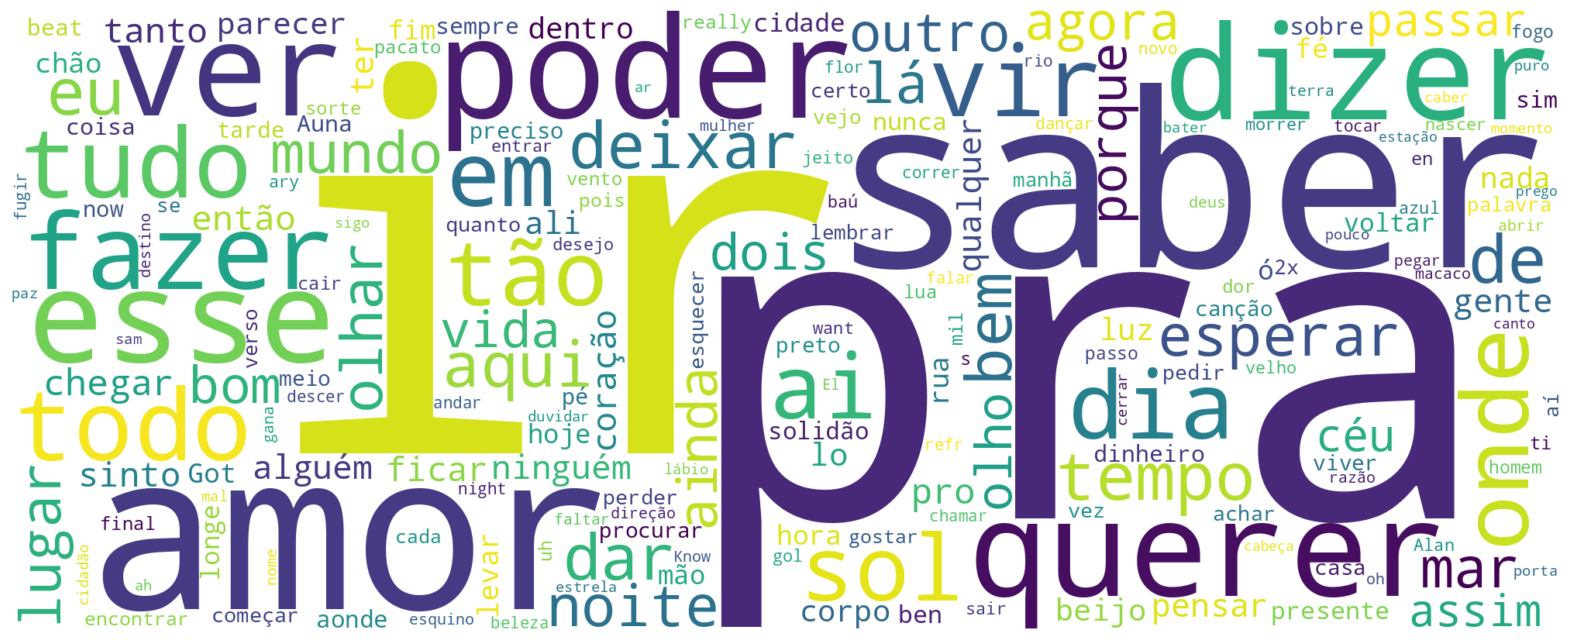

In [17]:
#Nuvem de palavras
from wordcloud import wordcloud

texto = " ".join(tokens_agrupados)
wordcloud = wordcloud.WordCloud(background_color="white", width=2000, height=800, collocations=False).generate(texto)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("skank.png", dpi=fig.dpi)
plt.show()